In [43]:
%load_ext autoreload
%autoreload 2
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append('../dataset/')
from dataset import AsbestosDataSet
import os 
from pathlib import Path
from PIL import Image
import albumentations as A
import cv2
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset, DataLoader

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
image_dir = '../../task_asbestos_stone_161220-2021_01_13_12_39_03-segmentation mask 1.1 (1)/JPEGImages/asbestos/stones/161220'
mask_dir  = '../../task_asbestos_stone_161220-2021_01_13_12_39_03-segmentation mask 1.1 (1)/SegmentationAsbest'
dataset = AsbestosDataSet(image_dir, mask_dir, transform=None, preload_data=True)

In [37]:
def train_val_dataset(dataset, val_split=0.25):
    train_idx, val_idx = train_test_split(list(range(len(dataset))), test_size=val_split)
    print(train_idx)
    datasets = {}
    datasets['train'] = Subset(dataset, train_idx)
    datasets['val'] = Subset(dataset, val_idx)
    return datasets
datasets = train_val_dataset(dataset)
len(datasets['train'])
len(datasets['val'])

[0, 2, 16, 27, 4, 6, 31, 50, 35, 33, 14, 36, 12, 13, 19, 22, 37, 49, 48, 44, 34, 38, 10, 28, 3, 17, 46, 24, 8, 29, 5, 7, 52, 23, 20, 15, 26, 25, 42, 32, 45, 40]


14

In [46]:
DataLoader(datasets['val'], batch_size = 3)

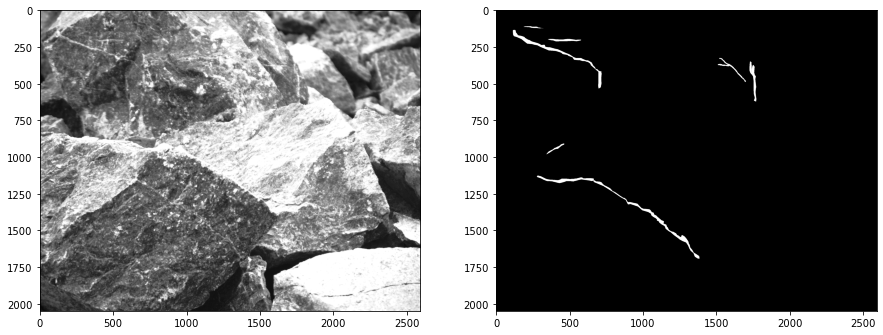

In [13]:
example = dataset[3]
image = example['image']
mask  = example['mask']

fig, ax = plt.subplots(1,2, figsize=(15,15), )
ax[0].imshow(image,cmap = 'Greys_r')
ax[1].imshow(mask, cmap = 'Greys_r')

In [7]:
t_h = 256
transform = A.Compose([A.RandomCrop(width=512*3, height=512*3), A.Resize(t_h,t_h), A.RandomRotate90()])

In [8]:
transform(image = dataset[0]['image'])

{'image': array([[0.6362746 , 0.6401961 , 0.6431373 , ..., 0.3147059 , 0.3137255 ,
         0.31078434],
        [0.5578432 , 0.4764706 , 0.41960785, ..., 0.28039217, 0.29901963,
         0.377451  ],
        [0.5813726 , 0.71176475, 0.6098039 , ..., 0.2627451 , 0.26862746,
         0.2245098 ],
        ...,
        [0.754902  , 0.8921569 , 0.93921566, ..., 0.36960787, 0.42745098,
         0.48137254],
        [0.71862745, 0.98333335, 1.        , ..., 0.34607846, 0.5284314 ,
         0.39313728],
        [0.71470594, 0.7519608 , 0.85784316, ..., 0.23921569, 0.3539216 ,
         0.42647058]], dtype=float32)}

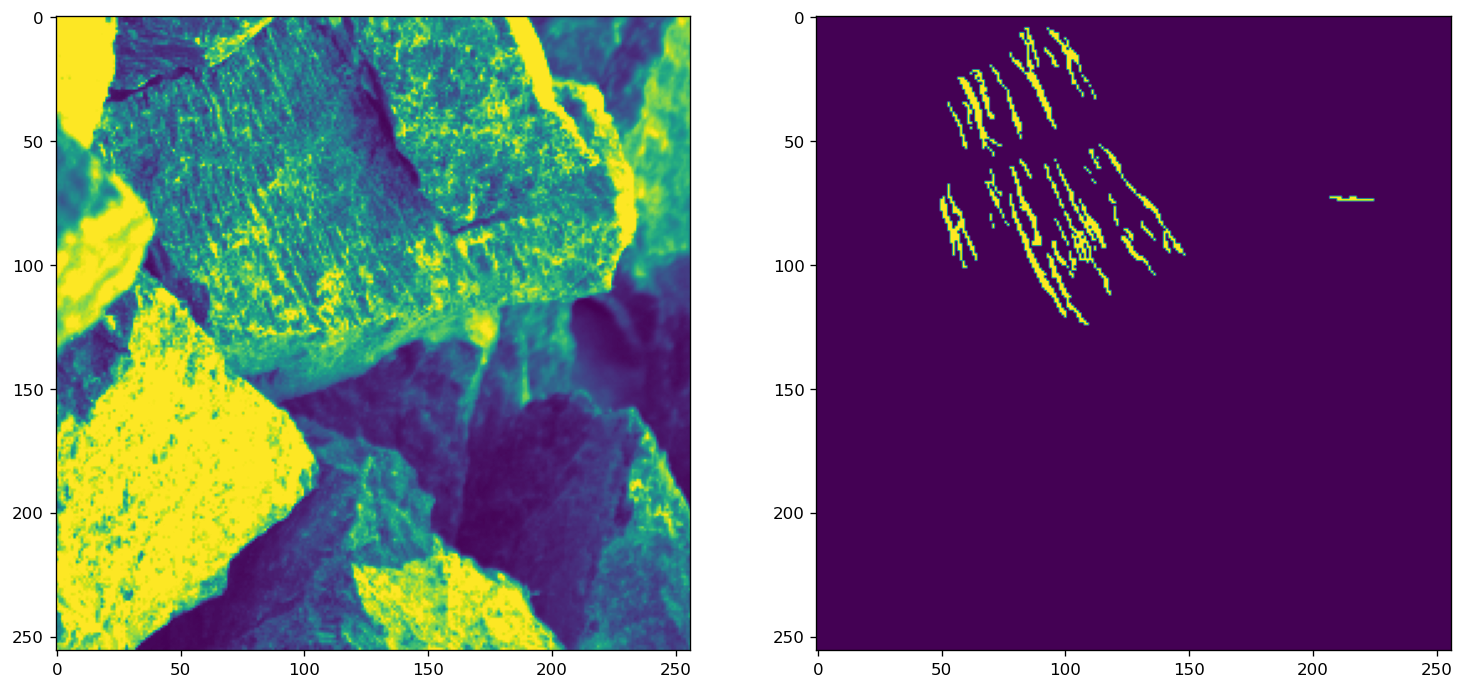

In [9]:
for i in range(2):
    example = dataset[i]
    image = example['image']
    mask  = example['mask']
    transformed = transform(image=np.array(image), mask=np.array(mask))
    transformed_image = transformed['image']
    transformed_mask = transformed['mask']
fig, ax = plt.subplots(1,2, figsize=(15,15), dpi = 120 )
ax[0].imshow(transformed_image)
ax[1].imshow(transformed_mask)

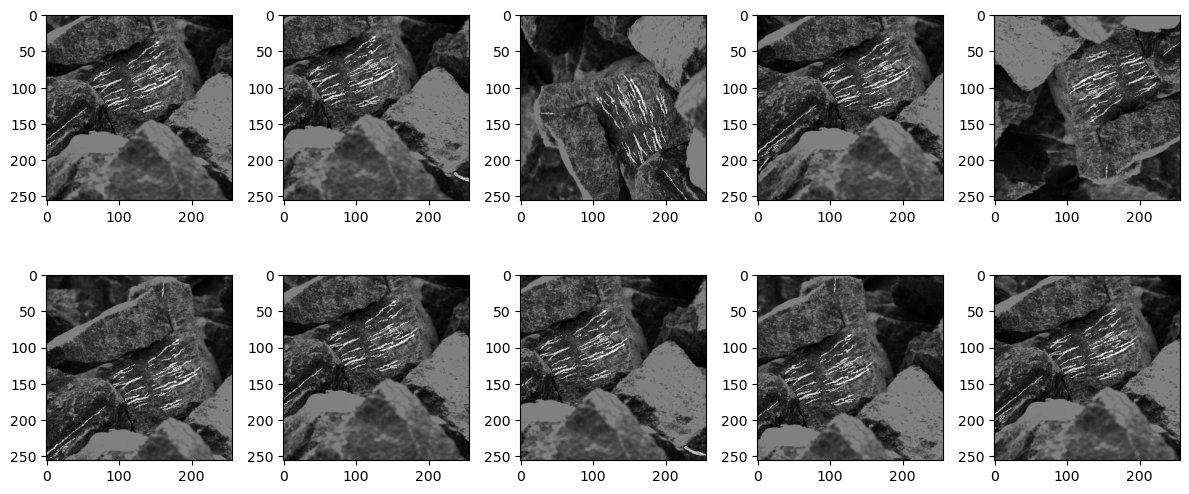

In [10]:
image = example['image']
mask  = example['mask']
fig, axis = plt.subplots(2,5, dpi = 100, figsize=(12,6))
j = 0
for i in range(10):
    transformed = transform(image=np.array(image), mask=np.array(mask))
    transformed_image = transformed['image']
    transformed_mask = transformed['mask']
    if i < 5:
        axis[0,i].imshow(transformed_image,cmap='gray',)
        axis[0,i].imshow(transformed_mask, alpha = 0.5, cmap='gray',)
    else:
        axis[1,i-5].imshow(transformed_image,cmap='gray',)
        axis[1,i-5].imshow(transformed_mask, alpha = 0.5, cmap='gray',)
    j+=1
    fig.tight_layout()

In [2]:
fig = plt.figure(dpi = 120)

plt.imshow(transformed_image, cmap='gray')
plt.imshow(transformed_mask, alpha = 0.4, cmap='gray',)

NameError: name 'transformed_image' is not defined

<Figure size 720x480 with 0 Axes>

In [35]:
trans_set = AsbestosDataSet(image_dir, mask_dir, transform)

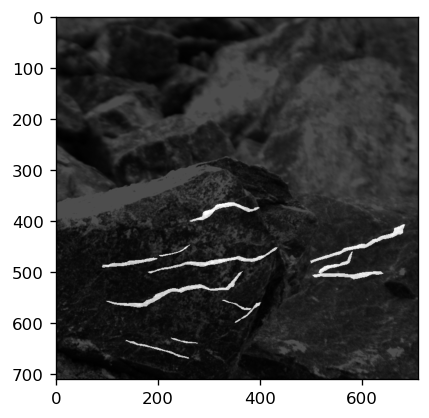

In [36]:
t = trans_set[26]
fig = plt.figure(dpi = 120)
plt.imshow(t['image'], cmap='gray')
plt.imshow(t['mask'], alpha = 0.7, cmap='gray',)

In [14]:
image_dir = '../../task_asbestos_stone_lab_common_camera-2021_12_10_13_12_14-mots png 1.0/images/asbestos/stones/lab_common_camera/'
mask_dir  = '../../task_asbestos_stone_lab_common_camera-2021_12_10_13_12_14-mots png 1.0/SegmentationAsbest'
dataset = AsbestosDataSet(image_dir, mask_dir, preload_data = True)

Inside ../../task_asbestos_stone_lab_common_camera-2021_12_10_13_12_14-mots png 1.0/images/asbestos/stones/lab_common_camera/ number of images and masks are different


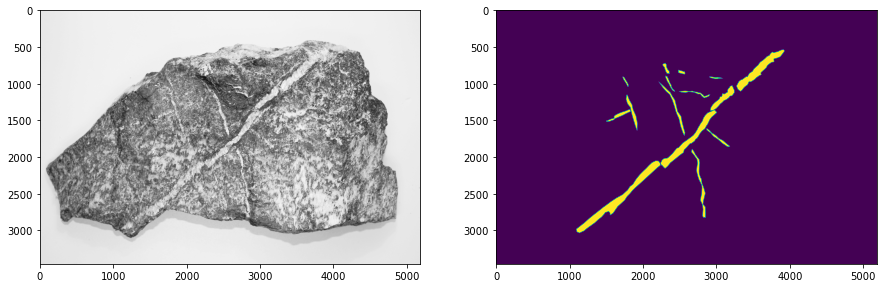

In [17]:
example = dataset[15]
image = example['image']
mask  = example['mask']
fig, ax = plt.subplots(1,2, figsize=(15,15), )
ax[0].imshow(image,cmap = 'Greys_r')
ax[1].imshow(mask)

In [18]:
import gc
gc.collect()

23

In [19]:
np.array(image.shape)//3

array([1152, 1728])

In [20]:
transform = A.Compose([A.RandomCrop(1024,1024), A.RandomRotate90()])
transform = A.Compose([A.Resize(1152, 1728), A.RandomCrop(1024,1024), A.Resize(512,512) ,A.RandomRotate90()])
# transform = A.Compose([A.Resize(1728,2592), A.RandomCrop(640,640), A.RandomRotate90()])

IMG_2708.png
(512, 512)


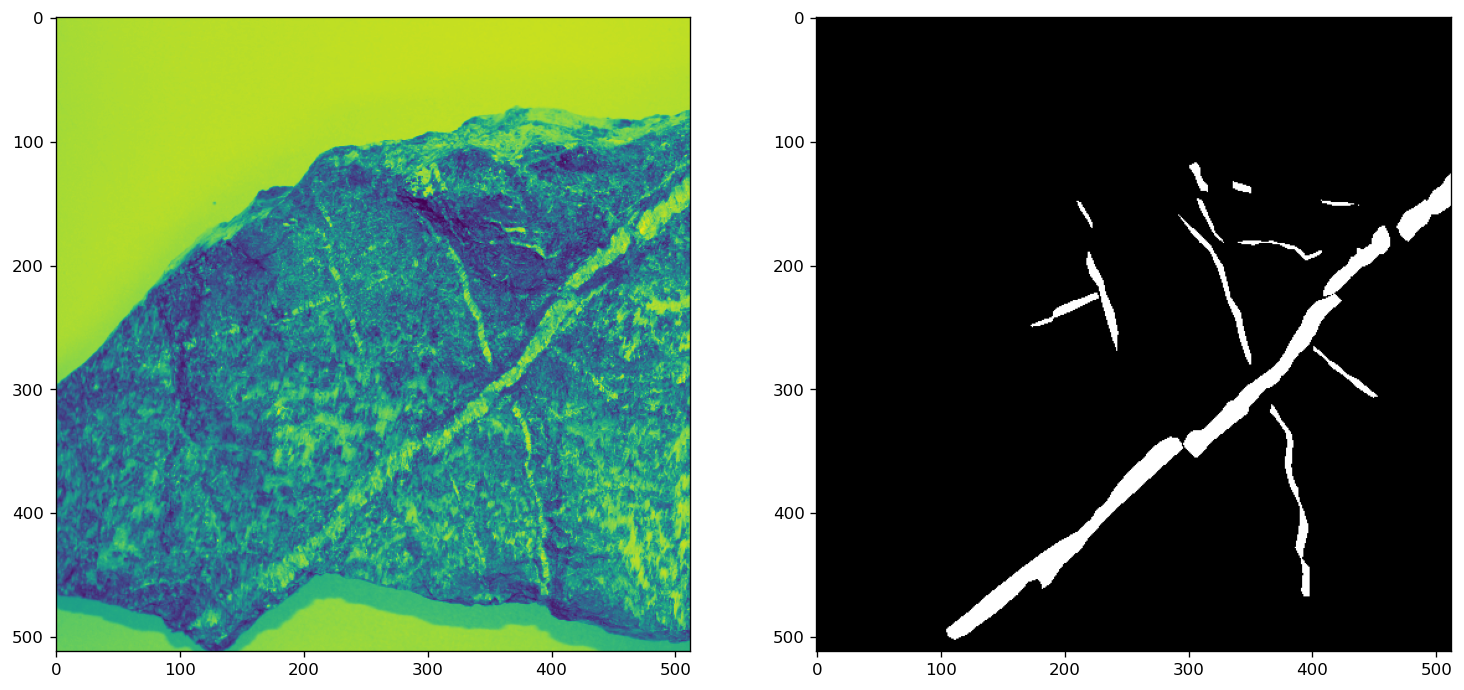

In [21]:
example = dataset[15]
image = example['image']
mask  = example['mask']
print(example['path'])
transformed = transform(image=np.array(image), mask=np.array(mask))
transformed_image = transformed['image']
transformed_mask = transformed['mask']
fig, ax = plt.subplots(1,2, figsize=(15,15), dpi = 120 )
ax[0].imshow(transformed_image)
ax[1].imshow(transformed_mask, cmap = 'gray')
print(transformed_image.shape)

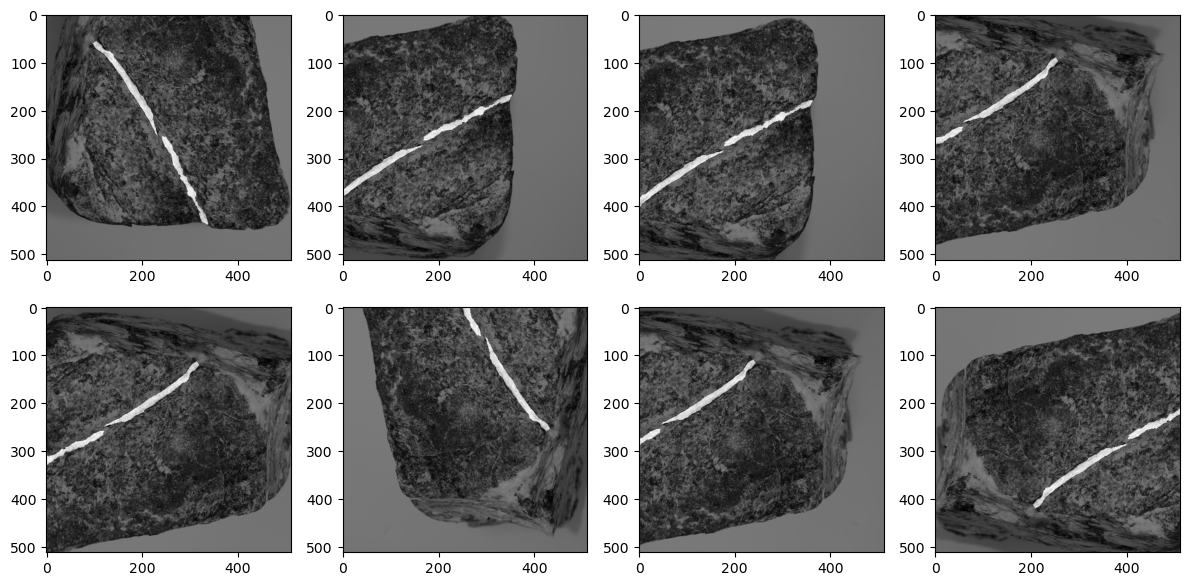

In [22]:
example = dataset[10]
image = example['image']
mask  = example['mask']

n = 4
fig, axis = plt.subplots(2,n, dpi = 100, figsize=(12,6))
j = 0
for i in range(2*n):
    transformed = transform(image=np.array(image), mask=np.array(mask))
    transformed_image = transformed['image']
    transformed_mask = transformed['mask']
    if i < n:
        axis[0,i].imshow(transformed_image,cmap='gray',)
        axis[0,i].imshow(transformed_mask, alpha = 0.5, cmap='gray',)
    else:
        axis[1,i-n].imshow(transformed_image,cmap='gray',)
        axis[1,i-n].imshow(transformed_mask, alpha = 0.5, cmap='gray',)
    j+=1
fig.tight_layout()

In [12]:
img1 = Image.fromarray((255*image[:,:,:3]).astype(np.uint8)).convert('L')

In [15]:
np.array(img1).shape

(3456, 5184)

In [85]:
name = '../../task_asbestos_stone_lab_common_camera-2021_12_10_13_12_14-mots png 1.0/images/asbestos/stones/lab_common_camera/IMG_2688.png'
image = np.array(Image.open(name))
w, h = np.array(image.shape[:2])//3 
w, h

(1152, 1728)

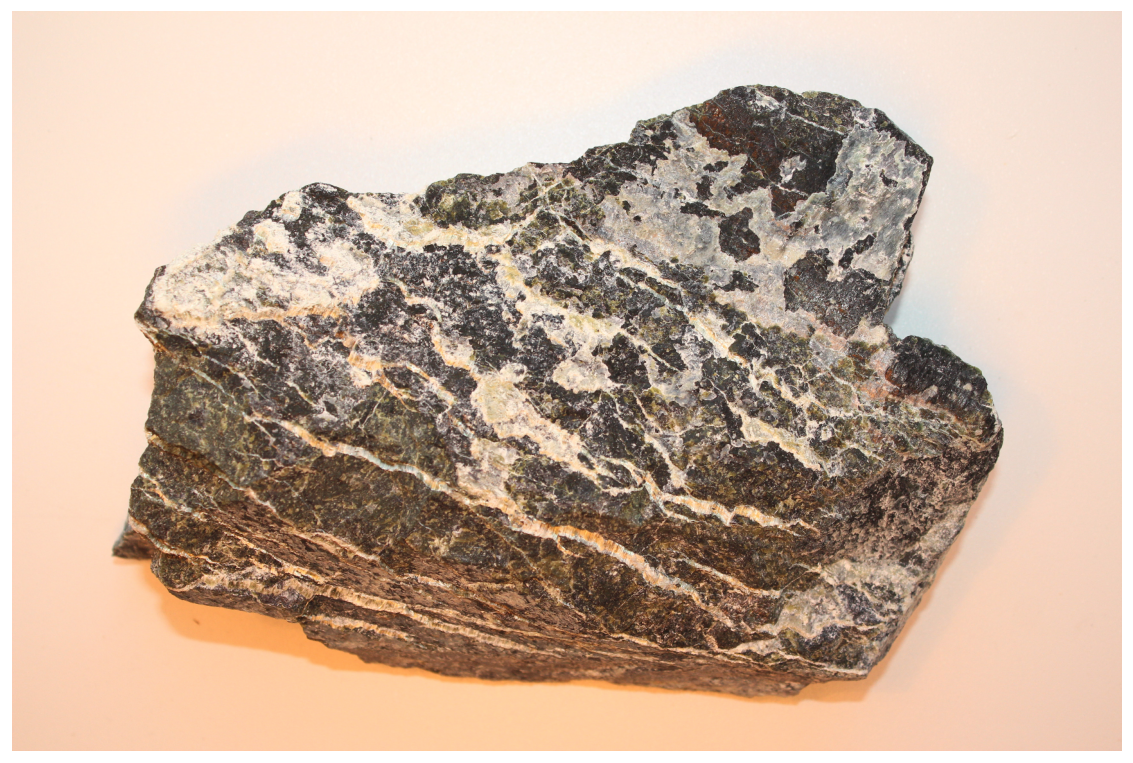

In [88]:
transform = A.Compose([A.Resize(w, h)])
t_image = transform(image=image)['image']
fig = plt.figure(figsize=(10,10), dpi = 120 )
plt.imshow(t_image)
plt.tight_layout()
plt.axis('off')
plt.savefig('./image_files/example_lab_image.png', dpi = 120, bbox_inches='tight')


In [63]:
from utils import get_files_from_dirs
from torch.utils.data import DataLoader, ConcatDataset

In [35]:
images = get_files_from_dirs(['../../task_asbestos_stone_161220-2021_01_13_12_39_03-segmentation mask 1.1 (1)/JPEGImages/asbestos/stones/161220',
                              '../../task_asbestos_stone_lab_common_camera-2021_12_10_13_12_14-mots png 1.0/images/asbestos/stones/lab_common_camera/' 
                             ])

In [68]:

image_dir = '../../task_asbestos_stone_161220-2021_01_13_12_39_03-segmentation mask 1.1 (1)/JPEGImages/asbestos/stones/161220'
mask_dir  = '../../task_asbestos_stone_161220-2021_01_13_12_39_03-segmentation mask 1.1 (1)/SegmentationAsbest'
s1 = AsbestosDataSet(image_dir, mask_dir)

s2 = AsbestosDataSet('../../task_asbestos_stone_161220-2021_01_13_12_39_03-segmentation mask 1.1 (1)/JPEGImages/asbestos/stones/161220', 
                         '../../task_asbestos_stone_161220-2021_01_13_12_39_03-segmentation mask 1.1 (1)/SegmentationAsbest')

In [80]:
s = ConcatDataset([s1,s2,s1])